# Evolutionary Computation for Evolving Neural Network EMG Classifier Structure and Weights
In this project, the goal is to improve the structure and weights of a neural network that classifies EMG signals, and compare the genetic solutions to standard classifiers.

Controls:
- Random Forest Classifier
- Neural Network (Backpropagation)

Evolutionary Models:
- NEAT (NeuroEvolution of Augmenting Topologies)
- HyperNEAT

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Imports
from __future__ import annotations
from pathlib import Path
from typing import List, Tuple, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Custom library
from emg_evo_lib_kb import *

In [3]:
# Dataset root
root_path = Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master")

# Column names in each raw file
emg_column_names = ["Time"] + [f"ch{i}" for i in range(1, 9)] + ["Class"]

# Gesture classes we care about (ignore 0 = unmarked)
gesture_classes = [1, 2, 3, 4, 5, 6, 7]

In [4]:
X, y, meta = build_feature_dataset(root_path, emg_column_names, gesture_classes)
print("X shape:", X.shape)
if len(X) > 0:
    print("Example feature vector length:", len(X[0]))
    print("Example feature vector:", X[0])
    print("Example label:", y[0])
    print("Example meta:", meta[0])

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

In [5]:
len(X)

872

In [6]:
y

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3,
       4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 5, 4, 6, 1, 2, 3,

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

/Users/kaanborekci/miniconda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaanborekci/miniconda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaanborekci/miniconda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

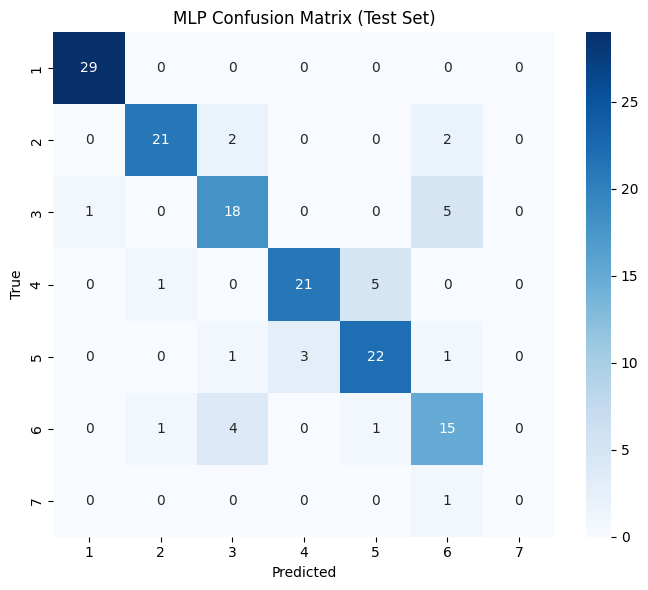

In [16]:
train_and_evaluate(root_path, emg_column_names, gesture_classes)